In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('/home/rgukt/Desktop/pro/case1_considered/memory_usage.csv')
data.head()

,timestamp,total_memory_mb,available_memory_mb,used_memory_mb,percent_memory
0,2024-06-15 12:29:50,5853.63,3318.09,2226.60,43.3
1,2024-06-15 12:30:50,5853.63,3444.76,2105.84,41.2
2,2024-06-15 12:31:50,5853.63,3409.28,2141.32,41.8
3,2024-06-15 12:32:50,5853.63,3431.80,2118.80,41.4
4,2024-06-15 12:33:50,5853.63,3425.77,2124.82,41.5


In [5]:
# Load the dataset
data = pd.read_csv('/home/rgukt/Desktop/pro/case1_considered/memory_usage.csv')

# Extract the relevant column
series = data['used_memory_mb'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
series = scaler.fit_transform(series.reshape(-1, 1)).flatten()


In [7]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X, y = create_sequences(series, seq_length)

# Reshape for LSTM input: [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))


In [8]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


/home/rgukt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Split data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.3011 - val_loss: 0.3233
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1496 - val_loss: 0.0555
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0185 - val_loss: 0.0025
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0087 - val_loss: 0.0118
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0055 - val_loss: 0.0018
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0051 - val_loss: 0.0030
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0038 - val_loss: 0.0030
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0045 - val_loss: 0.0022
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0042 - val_loss: 0.0024
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0033 - val_loss: 0.0020
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0036 - val_loss: 0.0024
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0

In [10]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 
Test Loss: 0.0014073374914005399


In [11]:
# Get the last sequence from the data
last_sequence = series[-seq_length:]

# Reshape for LSTM input
last_sequence = last_sequence.reshape((1, seq_length, 1))

# Predict the next value
next_value = model.predict(last_sequence)

# Inverse transform to get actual value
next_value_actual = scaler.inverse_transform(next_value).flatten()[0]

print(f'Predicted next value: {next_value_actual}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
Predicted next value: 3595.860595703125


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


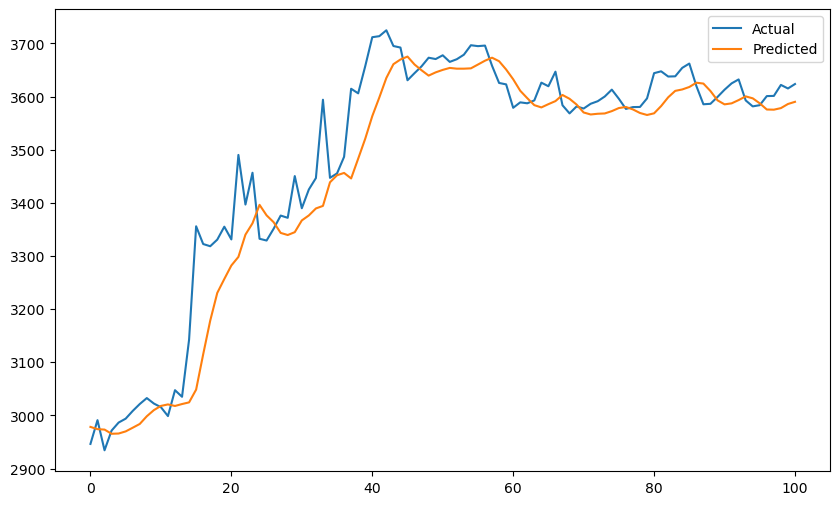

In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform to get actual values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_actual = scaler.inverse_transform(y_pred).flatten()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(y_pred_actual, label='Predicted')
plt.legend()
plt.show()


In [14]:
data.shape

(512, 5)